# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import the dataset

In [2]:
df=pd.read_csv('../input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA


# Firstly Drops RowNumber,CustomerId,Surname these columns

In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )

In [5]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

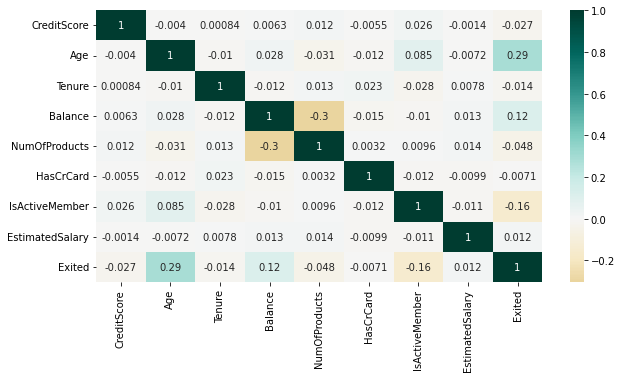

In [7]:
import seaborn as sns
#Calculating correlation between each pair of variables
corr_matrix=df.corr()
 
#Creating a seaborn heatmap
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Encoding the Categorical data

In [9]:
from sklearn import preprocessing
lable_encode=preprocessing.LabelEncoder()
df['Gender']=lable_encode.fit_transform(df['Gender'])
df['Geography']=lable_encode.fit_transform(df['Geography'])

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
X=df.drop(columns=['Exited'])
y=df['Exited']

# Split the dataset into train test split using sklearn lib

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)

# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Building our Model
In this part, we model our Artificial Neural Network model

In [14]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# initializing the ANN model
classifier=Sequential()

2022-10-04 06:33:09.407612: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
classifier.add(Dense(6, activation = 'relu',input_dim=10))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

In [17]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = classifier.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.25)

Epoch 1/100


2022-10-04 06:33:09.697662: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


563/563 [==============================] - 2s 2ms/step - loss: 0.5410 - accuracy: 0.7422 - val_loss: 0.4651 - val_accuracy: 0.8027
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4531 - accuracy: 0.7957 - val_loss: 0.4407 - val_accuracy: 0.8027
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4363 - accuracy: 0.7959 - val_loss: 0.4300 - val_accuracy: 0.8032
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.7979 - val_loss: 0.4220 - val_accuracy: 0.8117
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4186 - accuracy: 0.8028 - val_loss: 0.4132 - val_accuracy: 0.8181
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4094 - accuracy: 0.8228 - val_loss: 0.4035 - val_accuracy: 0.8363
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3977 - accuracy: 0.8336 - val_loss: 0.3931 - val_accuracy: 0.8405
Epoch 8/100

In [20]:
# list all data in history

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


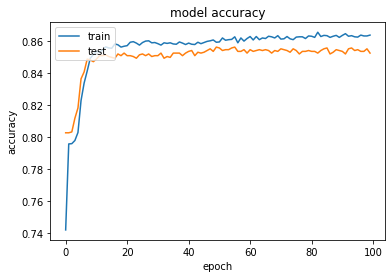

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

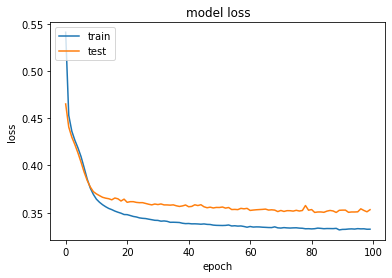

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction and Accuracy Result

In [23]:
# predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

# Confusion metrics

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1919,   63],
       [ 284,  234]])

# Score

In [25]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8612